In [1]:
import tensorflow
import keras

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2024-03-10 22:40:05.800744: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 22:40:06.187821: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 22:40:06.192375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 22:40:11.013330: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
nn = keras.models.Sequential()
nn.add(keras.layers.Dense(16, activation='relu'))
nn.add(keras.layers.Dense(16, activation='relu'))
nn.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
nn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
from sklearn.model_selection import train_test_split
x_val, x_test_new, y_val, y_test_new = train_test_split(
    x_test, y_test, test_size=15000, train_size=10000
)

In [6]:
history = nn.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2024-03-04 08:41:07.741351: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


49/49 [==============================] - 2s 29ms/step - loss: 0.4973 - accuracy: 0.7987 - val_loss: 0.3664 - val_accuracy: 0.8764
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2876 - accuracy: 0.9010 - val_loss: 0.2921 - val_accuracy: 0.8881
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2197 - accuracy: 0.9220 - val_loss: 0.2744 - val_accuracy: 0.8901
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1875 - accuracy: 0.9332 - val_loss: 0.2777 - val_accuracy: 0.8882
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1639 - accuracy: 0.9428 - val_loss: 0.3003 - val_accuracy: 0.8780
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1456 - accuracy: 0.9482 - val_loss: 0.3081 - val_accuracy: 0.8797
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1338 - accuracy: 0.9544 - val_loss: 0.3351 - val_accuracy: 0.8725
Epoch 8/20
49/49 [======

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

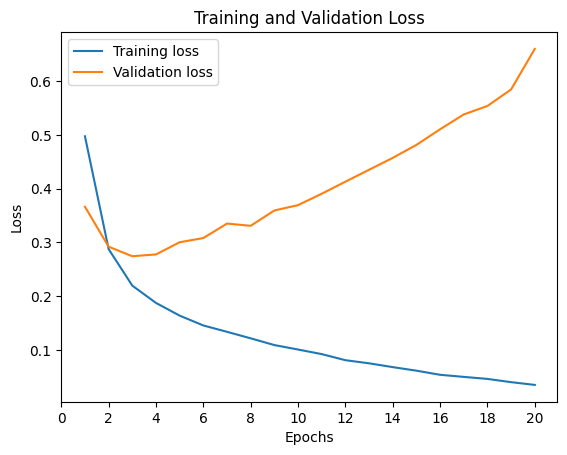

In [10]:
import matplotlib.pyplot as plt


epochs = range(1, 21)


plt.plot(epochs, history_dict['loss'], label= 'Training loss')
plt.plot(epochs, history_dict['val_loss'], label = 'Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0, 21, 2))
plt.legend(loc='best')
plt.show()

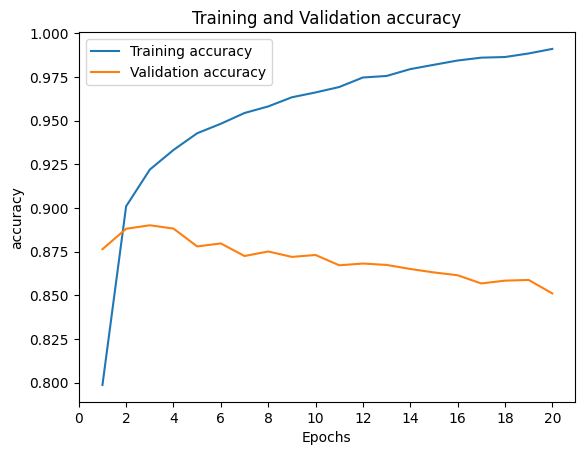

In [11]:
epochs = range(1, 21)


plt.plot(epochs, history_dict['accuracy'], label= 'Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label = 'Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, 21, 2))
plt.legend(loc='best')
plt.show()

In [12]:
test_loss, test_acc = nn.evaluate(x_test, y_test)

print('test_acc:', test_acc)

 46/782 [>.............................] - ETA: 1s - loss: 0.7285 - accuracy: 0.8444

2024-03-04 08:43:18.914206: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 2s 2ms/step - loss: 0.6612 - accuracy: 0.8512
test_acc: 0.8511599898338318


In [16]:
class myCallback(tensorflow.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.9):
            print("\nReached 90/100 accuracy")
            self.model.stop_training = True

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
callbacks = myCallback()

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10


2024-03-04 09:20:01.670536: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 3s 3ms/step - loss: 0.3237 - accuracy: 0.8676
Epoch 2/10
773/782 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9198
Reached 90/100 accuracy
782/782 [==============================] - 3s 3ms/step - loss: 0.2130 - accuracy: 0.9192


In [2]:
from sklearn.model_selection import GridSearchCV

def create_model():
    network = keras.models.Sequential()
    network.add(keras.layers.Dense(16, activation='relu'))
    network.add(keras.layers.Dense(16, activation='relu'))
    network.add(keras.layers.Dense(1, activation='sigmoid'))

    network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return network


In [10]:
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

par1_batch = [32, 64]
par2_epoch = [3, 5]

param_grid = dict(batch_size=par1_batch,
                epochs=par2_epoch
                )

grid = GridSearchCV(estimator=model,                     
                    param_grid=param_grid,
                    cv = 3
                    )

grid_results = grid.fit(x_train,y_train)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

/home/hyunmila/.asdf/installs/python/3.10.13/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/hyunmila/.asdf/installs/python/3.10.13/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/hyunmila/.asdf/installs/python/3.10.13/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/hyunmila/.asdf/installs/python/3.10.13/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which

ValueError: 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hyunmila/.asdf/installs/python/3.10.13/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hyunmila/.asdf/installs/python/3.10.13/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/hyunmila/.asdf/installs/python/3.10.13/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/hyunmila/.asdf/installs/python/3.10.13/lib/python3.10/site-packages/scikeras/wrappers.py", line 926, in _fit
    self._check_model_compatibility(y)
  File "/home/hyunmila/.asdf/installs/python/3.10.13/lib/python3.10/site-packages/scikeras/wrappers.py", line 549, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
TypeError: object of type 'NoneType' has no len()
